A solution to Supply & Demand with Equilibrium and Surplus in Python

These are not the cleverest algorithms, but hopefully the logic is decipherable.

Chuck Becker (becker@sonoma.edu), for ECON 381, Sonoma State University, Fall 2019

9/1/2019: (renamed constants and coefficients to conform with conventions)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

Class definition below, based on:

Qd = a - bP

Qs = c + dP

This assumes & depends on the demand function having a negative coefficient (a),
and the supply function having a positive coefficient (c).

In [23]:
class Market:
    
    def __init__(self, a, b, c, d):
        self.a = a
        self.b = b
        self.c = c
        self.d = d
                
    def price(self):
        # Returns equilibrium price
        return ( (self.a - self.c) / (self.d - self.b) )
    
    def quantity(self):
        # Returns equilibrium quantity
        return ( abs(self.a) + ( self.b * self.price() ) )
    
    
    def consumer_surplus(self):
        #  assumed to always be a right triangle....
        Pe = self.price()
        Qe = self.quantity()
        Yd = abs(a/b)
        return ( ( Yd - Pe ) * Qe * (1/2) )
        
    
    def producer_surplus(self):
        # may be a right triangle or may be a quadrilateral
        # Y intercept Ys may be pos, zero, or neg
        Pe = self.price()
        Qe = self.quantity()
        
        Ys = -(self.c/self.d)
        
        ps = ( Pe - Ys )* Qe *(1/2)
         
        if self.d > 0:
            return (ps + ( (Ys * d) * (1/2) ) )
        else:
            return ps
           
    def demand_curve(self):
        return ( [ 0, self.a ], [ abs(self.a/self.b), 0 ]  )
    
    def supply_curve(self):
        sc_1 = []
        if c < 0:
            sc_1 = [0, abs(self.c/self.d)]
        elif c == 0:
            sc_1 = [0,0]
        else:
            sc_1 = [self.c, 0]
        return ( [ sc_1[0], self.a ], [ sc_1[1], (self.a-self.c)/self.d ] )
        
        

In [27]:
print("DEMAND FUNCTION: Qd = a - bP")
a = float( input("Enter demand constant (a) with sign: " ) )
b = float( input("Enter demand coefficient (b) with sign: " ) )

print("----------------------------\n")
print("SUPPLY FUNCTION: Qs = c + dP")
c = float( input("Enter supply constant (c) with sign: " ) )
d = float( input("Enter supply coefficient (d) with sign: " ) )

if a < c:
    raise ValueError('Insufficient demand!')
if b >= 0:
    raise ValueError('Demand coefficient must be negative ... the whole world depends on it!')
if d <= 0:
    raise ValueError('Oh, my goodness, the supply coefficient must be positive!')

m = Market(a, b, c, d)

# below variables are global to this module.
cs = m.consumer_surplus()
ps = m.producer_surplus()
dc = m.demand_curve()
sc = m.supply_curve()
ep = m.price()
eq = m.quantity()

DEMAND FUNCTION: Qd = a - bP
Enter demand constant (a) with sign: 25
Enter demand coefficient (b) with sign: -3
----------------------------

SUPPLY FUNCTION: Qs = c + dP
Enter supply constant (c) with sign: -5
Enter supply coefficient (d) with sign: 3
a, b, c, d =  25.0 -3.0 -5.0 3.0


Time to plot the results....

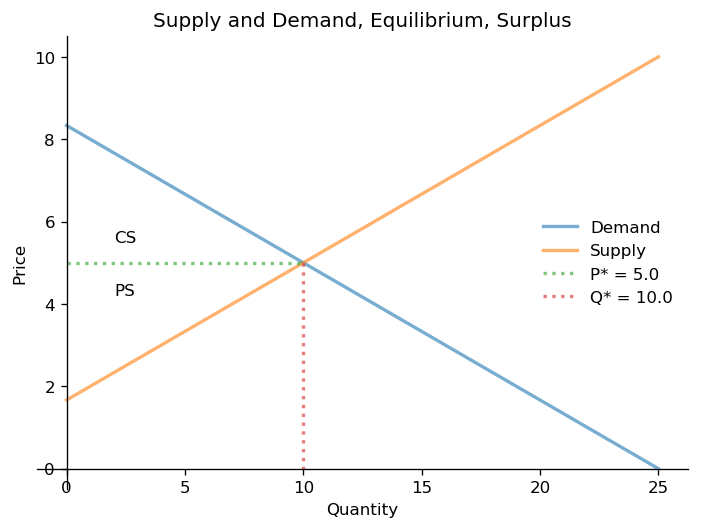

Equilibrium Price =  5.0
Equilibrium Quantity =  10.0
Consumer Surplus = 16.67
Producer Surplus = 19.17
Total Surplus = 35.83


In [28]:
#   Remember: Qd = b - aP       Qs = d + cP

fig, ax = plt.subplots(figsize=(7, 5), dpi=120)
ax = plt.gca()  # gca stands for 'get current axis', this was copied & pasted, no idea what it does....
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

ax.plot(dc[0], dc[1], linewidth=2, label='Demand', alpha=0.6 )
ax.plot(sc[0], sc[1], linewidth=2, label='Supply', alpha=0.6 )
plabel = "P* = " + str(round(ep,2))
qlabel = "Q* = " + str(round(eq,2))
ax.plot([0, eq], [ep, ep], linewidth=2, label=(plabel), alpha=0.6, linestyle=':')
ax.plot([eq, eq], [ep, 0], linewidth=2, label=(qlabel), alpha=0.6, linestyle=':')
plt.xlabel("Quantity")
plt.ylabel("Price")
ax.legend(loc='center right', frameon=False)
ax.set_title('Supply and Demand, Equilibrium, Surplus')
ax.annotate("CS", (eq/5, ep+.5))
ax.annotate("PS", (eq/5, ep-.8))
plt.show()

print("Equilibrium Price = ", str(round(ep,2)))
print("Equilibrium Quantity = ", str(round(eq,2)))
print('Consumer Surplus =', str(round(cs,2)))
print('Producer Surplus =', str(round(ps,2)))
print('Total Surplus =', str(round(cs+ps,2)))
